In [1]:
from math import sin, cos, sinh, cosh, pi, sqrt, fabs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import transforms
import matplotlib.animation as animation

In [2]:
def test_f(x,t):
    n = sin(x-t) + sin(x-2*t)
    return n

In [3]:
def f(x, t, re, l):
    a = sqrt(re/2)
    m = a*(1-x)
    n = l * sqrt(re) * (cos(t-pi/4)*(cos(a)*cosh(a)*(-a*cos(m)*cosh(m)+sin(m)*sinh(m)) - sin(a)*sinh(a)*(a*sin(m)*sinh(m)+cos(m)*cosh(m)))+
                   sin(t-pi/4)*(cos(a)*cosh(a)*(a*sin(m)*sinh(m)+cos(m)*cosh(m)) + sin(a)*sinh(a)*(-a*cos(m)*cosh(m)+sin(m)*sinh(m))))
    znam = (cos(a)**2) * (cosh(a)**2) + (sin(a)**2) * (sinh(a)**2)
    return fabs(n/znam)

In [4]:
f(x = 0.2, t = 2, re = 100, l =0.1)

1.7331751582866246

In [5]:
def v(x,t,re,l):
    a = sqrt(re/2)
    m = a*(1-x)
    n = l * cos(a)*cosh(a)*(cos(m)*cosh(m)*cos(t) - sin(m)* sinh(m)* sin(t)) + sin(a)*sinh(a)*(cos(m)*cosh(m)*sin(t) + sin(m)*sinh(m)*cos(t))
    znam = cos(a)**2 + sinh(a)**2
    return n /znam

In [6]:
v(0,4,10000, 0.2)

-0.6382858893792598

In [7]:
def get_supremum(re, l, times = pi):
    arr = np.linspace(0,1,1001)
    supremum = -100000
    for q in arr:
        if f(q,times,re,l) > supremum:
            supremum = f(q,times,re,l)
            k = q
    return supremum, k

In [8]:
get_supremum(100, 0.2, 0.6)

(14.268456659394793, 0.0)

In [9]:
def get_test_supremum(times = pi):
    arr = np.linspace(0,1,1001)
    supremum = -10000
    for q in arr:
        if test_f(q,times) > supremum:
            supremum = test_f(q,times)
            k = q
    return supremum, k

In [10]:
def get_speed(re,l,times = pi):
    result = []
    arr = np.linspace(0,1,1001)
    for q in arr:
        speed = v(q, times, re,l)
        result.append(speed)
    return result

In [11]:
def get_supr_func(re, l):
    times = np.linspace(0,14,14001)
    y_razb = []
    supremums = []
    for time in times:
        supr, k = get_supremum(times=time, re=re, l = l)
        y_razb.append(k)
        supremums.append(supr)
    return times, supremums

In [12]:
times, supr1 = get_supr_func(re = 100, l = 0.2)
times, supr2 = get_supr_func(re = 10, l = 0.2)
times, supr3 = get_supr_func(re = 1, l = 0.2)

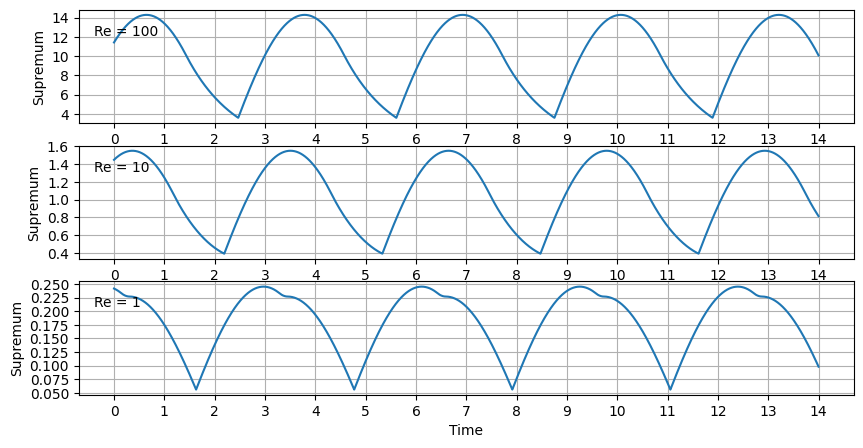

In [13]:
plt.figure(figsize=(10, 5))
plt.subplot(311)
plt.plot(times, supr1)
plt.locator_params (axis='x', nbins= 20 )
plt.locator_params (axis='y', nbins= 10 )
plt.title('Re = 100', loc='left', y=0.7, x=0.02,fontsize='medium')

plt.xlabel('Time')
plt.ylabel('Supremum')
plt.grid()
plt.subplot(312)
plt.plot(times, supr2)
plt.locator_params (axis='x', nbins= 20 )
plt.locator_params (axis='y', nbins= 10 )
plt.title('Re = 10', loc='left', y=0.7, x=0.02,fontsize='medium')
plt.xlabel('Time')
plt.ylabel('Supremum')
plt.grid()
plt.subplot(313)
plt.plot(times, supr3)
plt.locator_params (axis='x', nbins= 20 )
plt.locator_params (axis='y', nbins= 10 )
plt.title('Re = 1', loc='left', y=0.7, x=0.02,fontsize='medium')
plt.xlabel('Time')
plt.ylabel('Supremum')
plt.grid()
#plt.savefig('saved_fig.png')
plt.show()

In [14]:
times, supr4 = get_supr_func(re = 100, l = 0.1)
times, supr5 = get_supr_func(re = 10, l = 0.1)
times, supr6 = get_supr_func(re = 1, l = 0.1)

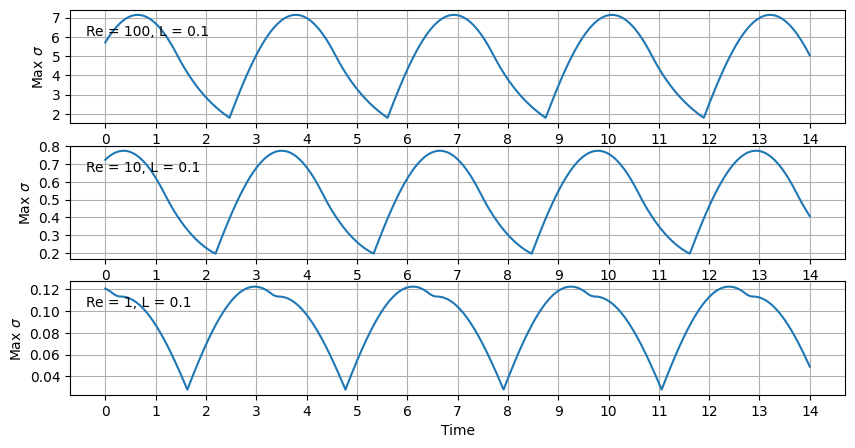

In [15]:
plt.figure(figsize=(10, 5))
plt.subplot(311)
plt.plot(times, supr4)
plt.locator_params (axis='x', nbins= 20 )
plt.locator_params (axis='y', nbins= 10 )
plt.title('Re = 100, L = 0.1', loc='left', y=0.7, x=0.02,fontsize='medium')

plt.xlabel('Time')
plt.ylabel('Max $\sigma$')
plt.grid()
plt.subplot(312)
plt.plot(times, supr5)
plt.locator_params (axis='x', nbins= 20 )
plt.locator_params (axis='y', nbins= 10 )
plt.title('Re = 10, L = 0.1', loc='left', y=0.7, x=0.02,fontsize='medium')
plt.xlabel('Time')
plt.ylabel('Max $\sigma$')
plt.grid()
plt.subplot(313)
plt.plot(times, supr6)
plt.locator_params (axis='x', nbins= 20 )
plt.locator_params (axis='y', nbins= 10 )
plt.title('Re = 1, L = 0.1', loc='left', y=0.7, x=0.02,fontsize='medium')
plt.xlabel('Time')
plt.ylabel('Max $\sigma$')
plt.grid()
plt.savefig('g_s_l0.1.png')
plt.show()

In [16]:
times, supr6 = get_supr_func(re = 200000, l = 0.2)

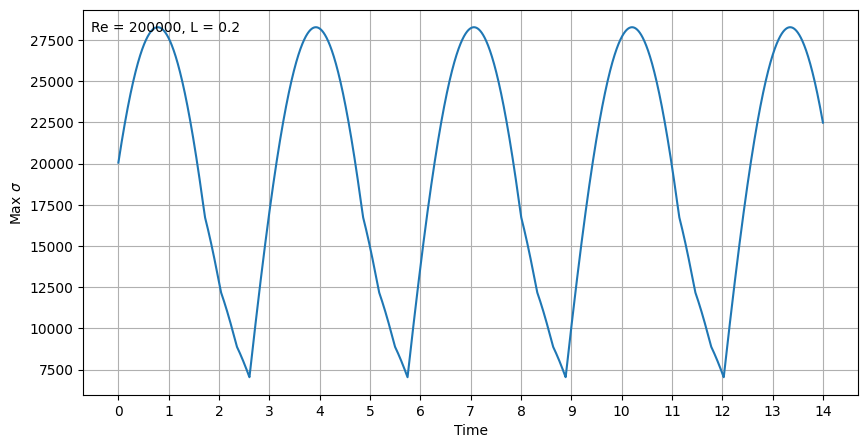

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(times, supr6)
plt.locator_params (axis='x', nbins= 20 )
plt.locator_params (axis='y', nbins= 10 )
plt.title('Re = 200000, L = 0.2', loc='left', y=0.92, x=0.01,fontsize='medium')
plt.xlabel('Time')
plt.ylabel('Max $\sigma$')
plt.grid()
plt.savefig('g_s_re200000.png')
plt.show()

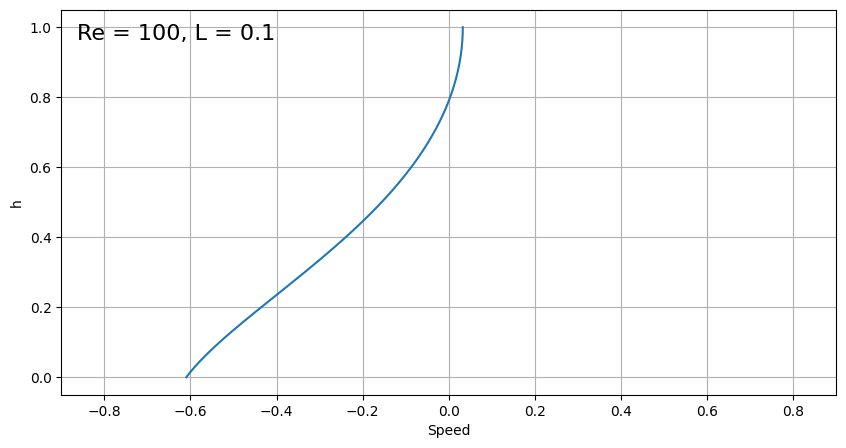

In [18]:
arr = np.linspace(0,1,1001)
v_s = get_speed(re=11,times=3, l =0.1)
plt.figure(figsize=(10, 5))
plt.ylabel('h')
plt.xlabel('Speed')
plt.plot(v_s, arr)
plt.xlim((-0.9, 0.9))
plt.grid()
plt.title('Re = 100, L = 0.1', loc='left', y=0.9, x=0.02,size = 16)
#plt.savefig('v_s_re200000.png')
plt.show()